In [33]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool1(x)        
        x = F.relu(self.conv2(x)) 
        x = self.pool2(x) 
        x = F.relu(self.conv3(x))  
        x = x.view(-1, 64 * 3 * 3)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [35]:
model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/5 | Loss: {avg_loss:.4f} | Accuracy: {acc:.4f}")

Epoch 1/5 | Loss: 0.1752 | Accuracy: 0.9457
Epoch 2/5 | Loss: 0.0497 | Accuracy: 0.9847
Epoch 3/5 | Loss: 0.0357 | Accuracy: 0.9883
Epoch 4/5 | Loss: 0.0284 | Accuracy: 0.9908
Epoch 5/5 | Loss: 0.0218 | Accuracy: 0.9931


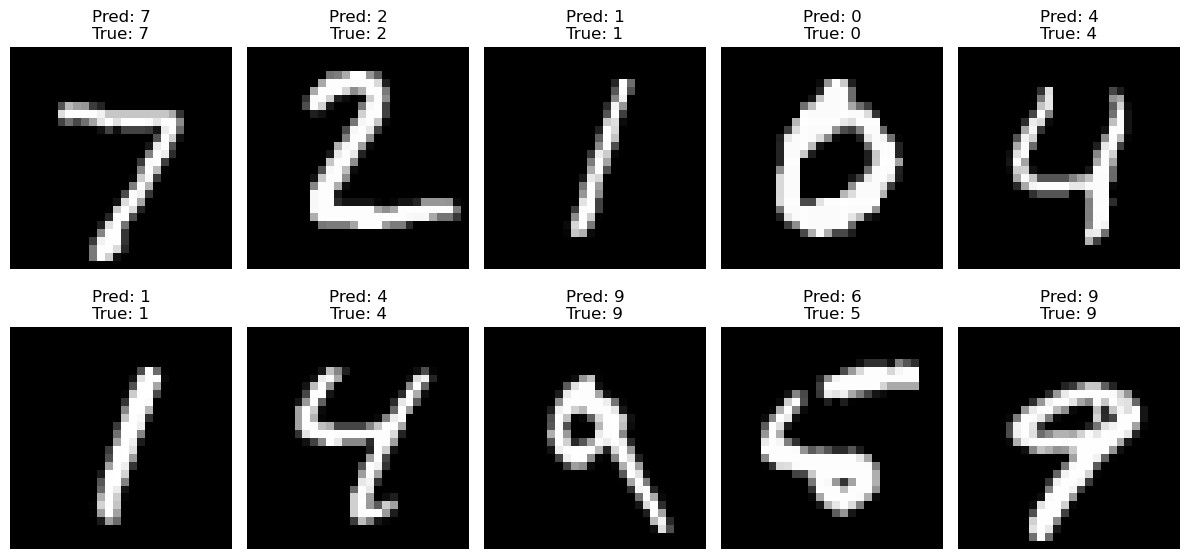

In [40]:
import matplotlib.pyplot as plt

data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images.to(device), labels.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

plt.figure(figsize=(12, 6))
for i in range(10):
    img = images[i].cpu().squeeze()
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()